# Credit Scoring Analysis 

### Informasi Data
Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).

### Tujuan Pemodelan
Memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.


In [114]:
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBClassifier
#from imblearn.metrics import geometric_mean_score
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss

In [115]:
data=pd.read_csv('training.csv')
test=pd.read_csv('testing.csv',sep=';')
print(data.shape,test.shape)

(16625, 16) (16625, 15)


In [86]:
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [183]:
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [125]:
y=data['TARGET']
data=data.drop('TARGET',1)
datagabung=pd.concat([data,test],1)
datagabung
print(datagabung.shape)

(16625, 30)


In [126]:
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0


# Data Understanding

### BATAS MAKSIMAL KREDIT

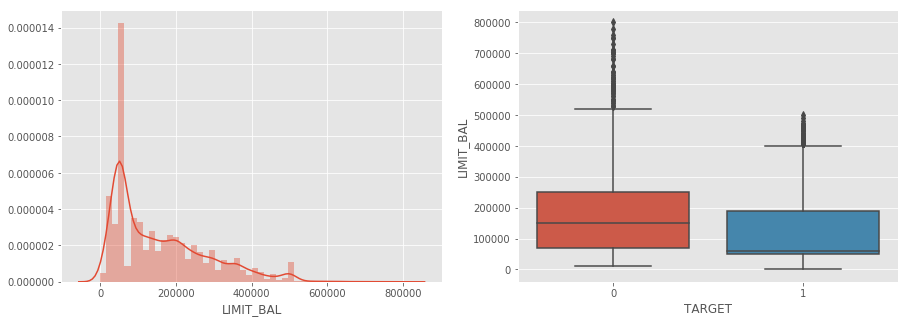

In [140]:
plt.style.use('ggplot')
f=plt.figure(figsize=(15,5))
f.add_subplot(1,2,1)
sns.distplot(data['LIMIT_BAL'])
f.add_subplot(1,2,2)
sns.boxplot(y=data['LIMIT_BAL'],x=y)

1. Batas Maksimal Kredit dari para customer kebanyakan ada di sekitar 50000 sampai 200000
2. Setelah dipisah sesuai TARGET, terlihat bahwa customer yang tidak terlambat bayar, batas maksimal kreditnya lebih tinggi dibandingkan yang terlambat bayar 

## Umur

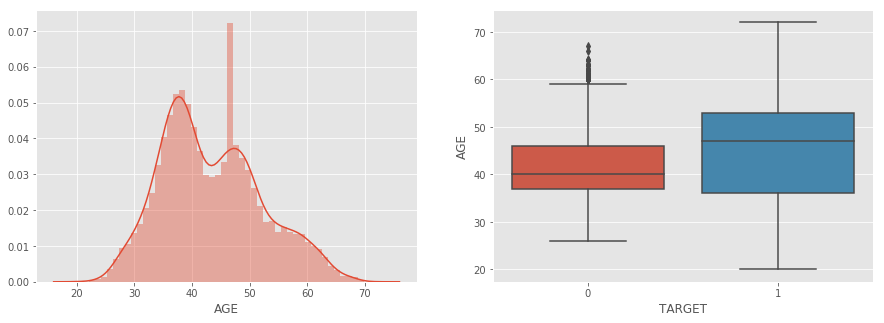

In [141]:
f=plt.figure(figsize=(15,5))
f.add_subplot(1,2,1)
sns.distplot(data['AGE'])
f.add_subplot(1,2,2)
sns.boxplot(y=data['AGE'],x=y)

1. Terlihat bahwa pemusatan umur customer terdapat dalam dua umur yang mendominasi, yaitu pada umur 35-40 dan 45-50
2. Setelah di split berdasarkan variabel TARGET, terlihat bahwa customer yang tidak terlambat dalam Pembayaran ada di sekitar umur 35-45 tahun

## Batas Maksimal Kredit Bulan 1,2 dan 3

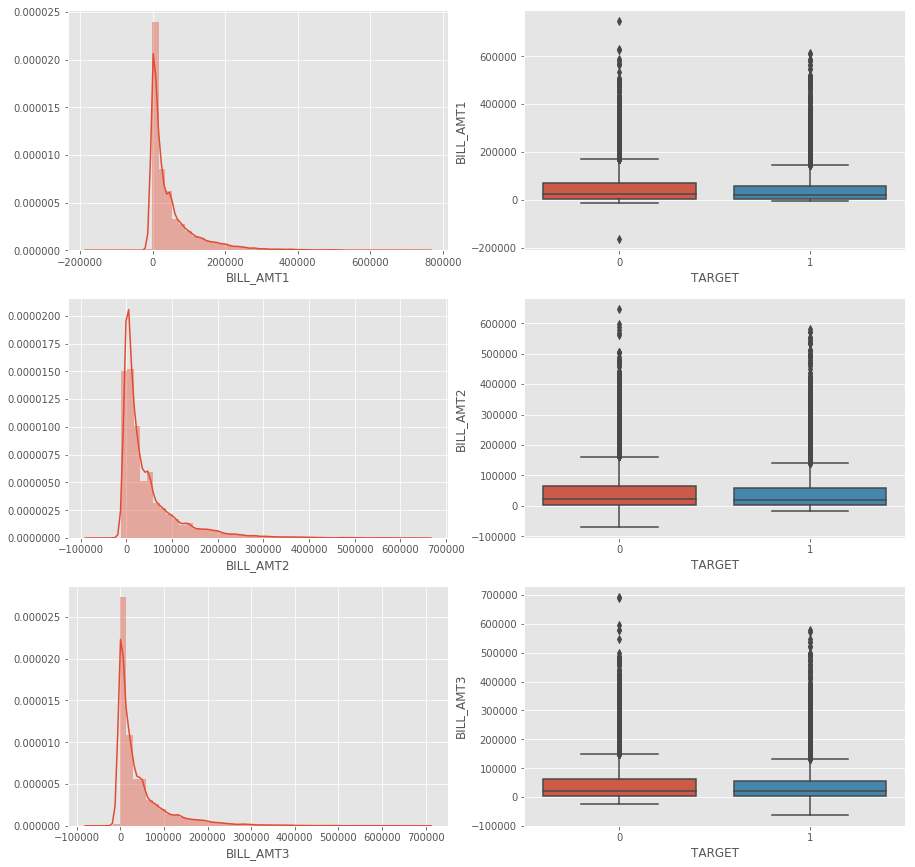

In [146]:
f=plt.figure(figsize=(15,15))
f.add_subplot(3,2,1)
sns.distplot(data['BILL_AMT1'])
f.add_subplot(3,2,2)
sns.boxplot(y=data['BILL_AMT1'],x=y)
f.add_subplot(3,2,3)
sns.distplot(data['BILL_AMT2'])
f.add_subplot(3,2,4)
sns.boxplot(y=data['BILL_AMT2'],x=y)
f.add_subplot(3,2,5)
sns.distplot(data['BILL_AMT3'])
f.add_subplot(3,2,6)
sns.boxplot(y=data['BILL_AMT3'],x=y)

1. Terlihat bahwa batas maksimum kredit dari bulan 1,2 dan 3 kebanyakan berada di sekitar 0 sampai 100000

## Jumlah yang Harus Dibayar

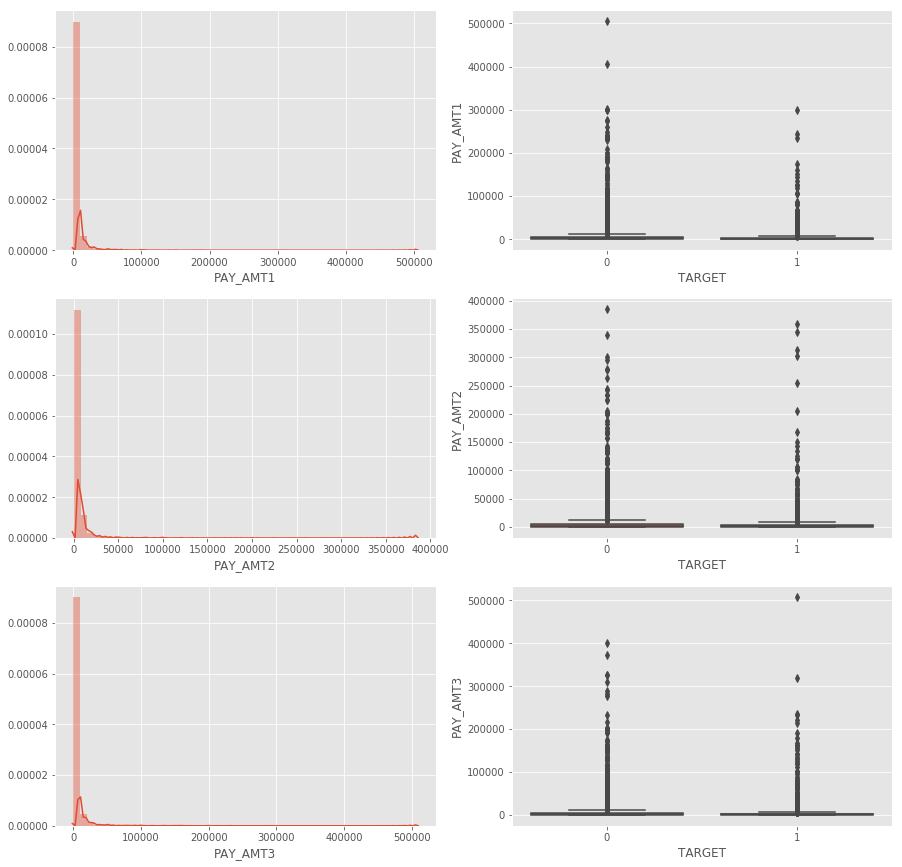

In [150]:
f=plt.figure(figsize=(15,15))
f.add_subplot(3,2,1)
sns.distplot(data['PAY_AMT1'])
f.add_subplot(3,2,2)
sns.boxplot(y=data['PAY_AMT1'],x=y)
f.add_subplot(3,2,3)
sns.distplot(data['PAY_AMT2'])
f.add_subplot(3,2,4)
sns.boxplot(y=data['PAY_AMT2'],x=y)
f.add_subplot(3,2,5)
sns.distplot(data['PAY_AMT3'])
f.add_subplot(3,2,6)
sns.boxplot(y=data['PAY_AMT3'],x=y)

1. Terlihat bahwa jumlah yang harus dibayar oleh para customer banyak dan berkisar di antara 0 - 25000

# Correlation Plot

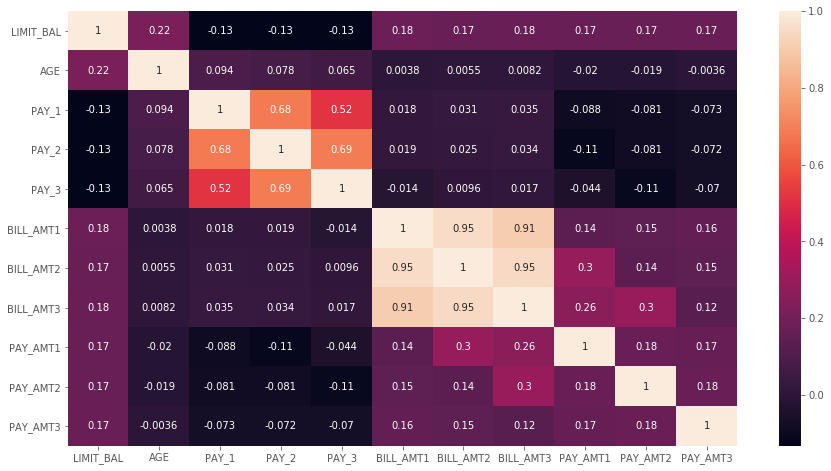

In [157]:
#Next step, we should choose numerical data first
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(['ID','SEX','EDUCATION','MARRIAGE'],1).corr(),annot=True)

1. Dari Matrik korelasi di atas terlihat bahwa ada hubungan yang sangat kuat antara Batas maksimum kredit pada bulan pertama, kedua dan ketiga.
Ternyata ada customer yang belum membayar di bulan 1, maka di bulan ke 2 di bayar. oleh karena itu korelasi antar bulan ke 1,2 dan ke 3 sangat tinggi.

In [160]:
data['MARRIAGE']=pd.Categorical(data['MARRIAGE'])
data['EDUCATION']=pd.Categorical(data['EDUCATION'])
data['SEX']=pd.Categorical(data['SEX'])

# Marriage and Education

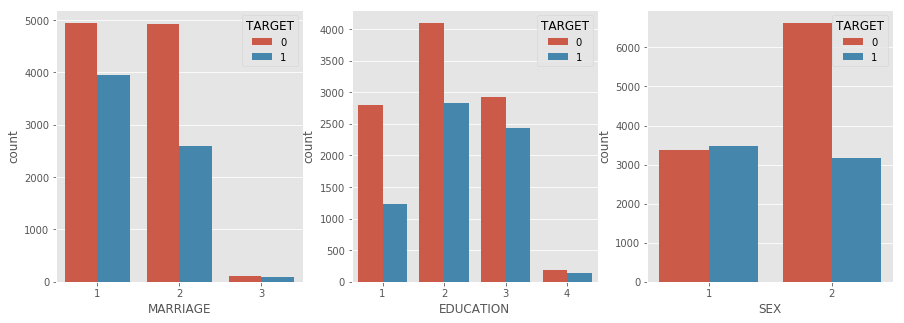

In [167]:
f=plt.figure(figsize=(15,5))
f.add_subplot(1,3,1)
sns.countplot(data['MARRIAGE'], hue=y)
f.add_subplot(1,3,2)
sns.countplot(data['EDUCATION'], hue=y)
f.add_subplot(1,3,3)
sns.countplot(data['SEX'], hue=y)

Marriage
1: Belum Menikah
2: Menikah
3: Lainnya
    
Education
1: S2/S3
2: Dipl/S1
3: SMA
4: Lainnya

SEX
1: Pria
2: Wanita
    
Dari grafik Marriage, terlihat bahwa customer yang belum menikah, lebih banyak terlambat membayar dibanding yang sudah menikah
Dari grafik Education, terlihat bahwa customer yang masih kuliah ternyata sering sekali terlambat membayar. 

Yang pendidikannya SMA lebih sedikit mungkin dikarenakan masih banyak yang belum kredit di bank.
Semakin tinggi pendidikan seseorang, semakin kecil peluang dia untuk terlambat bayar

Dari Grafik Jenis kelamin, terlihat bahwa Perempuan memiliki peluang untuk terlambat bayar lebih tinggi dibandingkan laki-laki 

## Feature Engineering

In [116]:
data['MARRIAGE']=pd.Categorical(data['MARRIAGE'])
#data['EDUCATION']=pd.Categorical(data['EDUCATION'])
data['SEX']=pd.Categorical(data['SEX'])

test['MARRIAGE']=pd.Categorical(test['MARRIAGE'])
#test['EDUCATION']=pd.Categorical(test['EDUCATION'])
test['SEX']=pd.Categorical(test['SEX'])



In [117]:
y=data['TARGET']
data=data.drop('TARGET',1)
datagabung=pd.concat([data,test],0)
#datagabung
#print(datagabung.shape)

datagabung_drop=datagabung.drop(['ID'],1)
Xgabung=pd.get_dummies(datagabung_drop,drop_first=True)
Xgabung['LIMIT_BAL']=np.sqrt(Xgabung['LIMIT_BAL'])
Xgabung['PAY_AMT1']=np.sqrt(Xgabung['PAY_AMT1'])
Xgabung['PAY_AMT2']=np.sqrt(Xgabung['PAY_AMT2'])
Xgabung['PAY_AMT3']=np.sqrt(Xgabung['PAY_AMT3'])
Xgabung.head()


,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,MARRIAGE_2,MARRIAGE_3,SEX_2
0,173.205081,1,40,0,0,0,24607.0,24430.0,23881.0,41.231056,40.000000,35.874782,0,0,1
1,141.421356,1,41,1,2,0,17040.0,16474.0,17203.0,0.000000,36.055513,38.729833,0,0,1
2,141.421356,1,36,0,0,0,17332.0,18600.0,17947.0,39.749214,36.972963,34.322005,0,0,1
3,141.421356,1,35,0,0,0,2003.0,2948.0,3372.0,32.954514,31.622777,0.000000,0,0,1
4,412.310563,1,38,0,0,0,171465.0,145196.0,110163.0,136.014705,118.313144,61.318839,0,0,1


# Modelling

## Train Test Split

In [89]:
df_train = Xgabung[:len(data)]
df_test = Xgabung[len(data):]

In [90]:
#df_train.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train,y,test_size=0.3)

## Machine Learning Modeling Comparison

In [91]:
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
## collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier]
all_model

[sklearn.tree.tree.DecisionTreeClassifier,
 sklearn.linear_model.logistic.LogisticRegression,
 sklearn.neighbors.classification.KNeighborsClassifier,
 sklearn.naive_bayes.GaussianNB,
 sklearn.svm.classes.SVC,
 sklearn.svm.classes.LinearSVC,
 sklearn.ensemble.forest.RandomForestClassifier,
 sklearn.ensemble.gradient_boosting.GradientBoostingClassifier,
 sklearn.ensemble.forest.ExtraTreesClassifier]

In [92]:
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for i in all_model:
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    datatr.append(model.score( X_train , y_train ))
    datasc.append(model.score( X_test , y_test ))
    Recall.append(recall_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test,y_pred))
   # print(i, model.score( X_train , y_train ) , model.score( X_test , y_test ))

C:\Users\fransd064180\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\fransd064180\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\fransd064180\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\fransd064180\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20

## Model Comparison

In [93]:
## compare model each other

data1 = pd.DataFrame()
data1['model'] = all_model
data1['Accuracy training'] = datatr
data1['Accuracy test'] = datasc
data1['Precision'] = Precision
data1['Recall']= Recall
data1['AUC']=auc
data1['gap'] = abs(data1['Accuracy training'] - data1['Accuracy test'])
data1.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
7,<class 'sklearn.ensemble.gradient_boosting.Gra...,0.884592,0.873095,0.848390,0.827342,0.865214,0.011497
6,<class 'sklearn.ensemble.forest.RandomForestCl...,0.992782,0.853649,0.844494,0.772658,0.839698,0.139133
8,<class 'sklearn.ensemble.forest.ExtraTreesClas...,0.999656,0.833601,0.836171,0.721013,0.814207,0.166056
0,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.999656,0.830393,0.779317,0.797468,0.824722,0.169263
1,<class 'sklearn.linear_model.logistic.Logistic...,0.746670,0.745790,0.727624,0.572152,0.715880,0.000880
3,<class 'sklearn.naive_bayes.GaussianNB'>,0.722093,0.708099,0.609540,0.731139,0.712068,0.013994
4,<class 'sklearn.svm.classes.SVC'>,0.997336,0.618484,0.846154,0.044557,0.519623,0.378852
2,<class 'sklearn.neighbors.classification.KNeig...,0.750021,0.607658,0.505351,0.430380,0.577122,0.142363
5,<class 'sklearn.svm.classes.LinearSVC'>,0.572055,0.572574,0.425733,0.227848,0.513194,0.000520


From the model comparison, we can see that the best model is Gradient Boosting because this model has the highest Accuration and AUC 

## Tuning Hyperparameter Gradient Boosting

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV            
p_test3 = {'learning_rate':[0.01,0.005,0.001], 'n_estimators':[100,250,500,750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.01, 'n_estimators': 750}, 0.8680921760954672)

# Fit Fix Model

In [118]:
model=GradientBoostingClassifier(learning_rate=0.01,n_estimators=750)
model.fit(X_train,y_train)
%time


Wall time: 0 ns


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3013
           1       0.84      0.72      0.77      1975

    accuracy                           0.83      4988
   macro avg       0.83      0.81      0.82      4988
weighted avg       0.83      0.83      0.83      4988



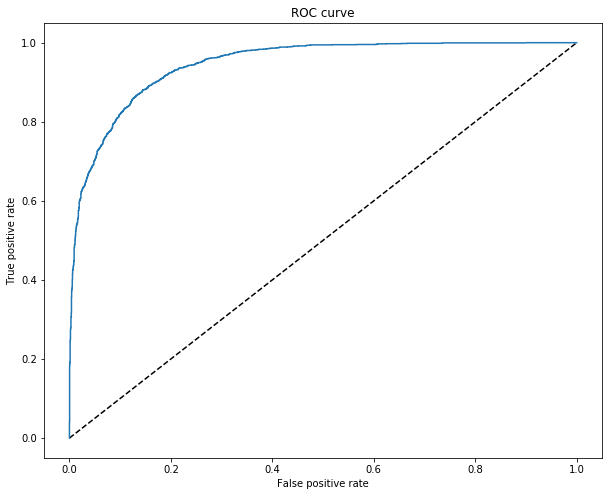

In [119]:

from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_ensemble):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    fpr, tpr, _ = roc_curve(y_test, P_ensemble)
    plt.plot(fpr, tpr)
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

print(classification_report(y_test,y_pred))
y_pred_proba=model.predict_proba(X_test)
plot_roc_curve(y_test,y_pred_proba[:,1])

# Top 5 Feature Importances

In [120]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

to_bar = pd.DataFrame([Xgabung.columns[indices],importances[indices]]).transpose()
to_bar.columns = ['Feature','Value']

Wall time: 0 ns
Feature ranking:


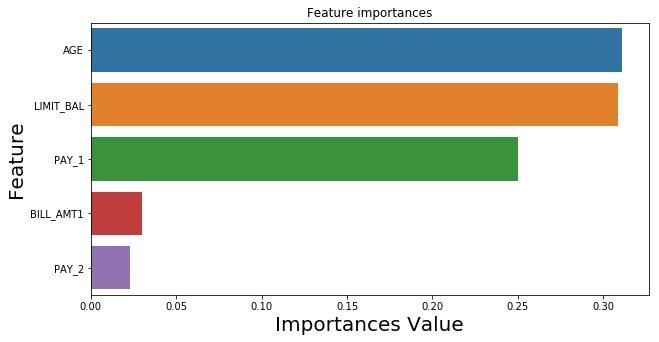

1. feature AGE (0.311115)
2. feature LIMIT_BAL (0.308776)
3. feature PAY_1 (0.249943)
4. feature BILL_AMT1 (0.030214)
5. feature PAY_2 (0.023165)


In [121]:
import time
%time
# Print the feature ranking
print("Feature ranking:")

# Plot the feature importances of the forest

plt.figure(1, figsize=(10, 5))
plt.title("Feature importances")
ax = sns.barplot(x='Value',y='Feature',data=to_bar[0:5])
plt.xlabel('Importances Value', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.show()
for f in range(5):
    print("%d. feature %s (%f)" % (f + 1, Xgabung.columns[indices[f]], importances[indices[f]]))

Variabel yang paling berpengaruh terhadap peluang customer tersebut terlambat membayar atau tidak adalah Umur , Batas Maksimal Kredit, dan Pembayaran di Bulan Pertama

In [127]:
hasil_prediksi = model.predict(df_test)
Hasil=pd.DataFrame()
Hasil['TARGET']=hasil_prediksi
result=pd.concat([test,Hasil],1)
result.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


In [129]:
result.to_csv('test_result.csv')